# Testing the h5 files for training

In [2]:
import pandas as pd

# Load each dataset into a DataFrame
train_x_df = pd.read_hdf('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/reduced_hlt_train_set_2023_x.h5')
val_x_df = pd.read_hdf('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/reduced_hlt_val_set_2023_x.h5')
val_y_df = pd.read_hdf('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/reduced_hlt_val_set_2023_y.h5')
test_x_df = pd.read_hdf('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/reduced_hlt_test_set_2023_x.h5')
test_y_df = pd.read_hdf('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/reduced_hlt_test_set_2023_y.h5')

# Display the first few rows of each DataFrame to understand their structure
print("Train X Data:")
print(train_x_df.head())

print("\nValidation X Data:")
print(val_x_df.head())

print("\nValidation Y Data:")
print(val_y_df.head())

print("\nTest X Data:")
print(test_x_df.head())

print("\nTest Y Data:")
print(test_y_df.head())


Train X Data:
                                  m_1  m_2  m_3  m_4  m_5  m_6  m_7  m_8  m_9  \
2023-06-07 22:21:55.001335+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-06-07 22:22:00.001371+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-06-07 22:22:05.001551+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-06-07 22:22:10.001427+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2023-06-07 22:22:15.001400+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                  m_10  ...  std_86  std_87  std_88  std_89  \
2023-06-07 22:21:55.001335+02:00   0.0  ...     0.0     0.0     0.0     0.0   
2023-06-07 22:22:00.001371+02:00   0.0  ...     0.0     0.0     0.0     0.0   
2023-06-07 22:22:05.001551+02:00   0.0  ...     0.0     0.0     0.0     0.0   
2023-06-07 22:22:10.001427+02:00   0.0  ...     0.0     0.0     0.0     0.0   
2023-06-07 22:22:15.001400+02:00   0.0  ...     0.0     0.0     0.0     0.0   

                        

In [4]:
random_row_train = train_x_df.sample(n=1, random_state=42)
print("\n random pick row of Train X :")
print(random_row_train)


 random pick row of Train X :
                                  m_1  m_2  m_3  m_4  m_5  m_6  m_7  m_8  m_9  \
2023-06-10 23:23:35.001653+02:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                  m_10  ...  std_86  std_87  std_88  std_89  \
2023-06-10 23:23:35.001653+02:00   0.0  ...     0.0     0.0     0.0     0.0   

                                  std_90  std_91  std_92  std_93  std_94  \
2023-06-10 23:23:35.001653+02:00     0.0     0.0     0.0     0.0     0.0   

                                  std_95  
2023-06-10 23:23:35.001653+02:00     0.0  

[1 rows x 146 columns]


In [8]:
row_index = 84
specific_row_train = train_x_df.iloc[row_index]
print("\nThe 84th row in Train X DataFrame:")
print(specific_row_train)


The 84th row in Train X DataFrame:
m_1       26.399293
m_2       26.400046
m_3       26.200067
m_4       26.000035
m_5       26.000042
            ...    
std_91     0.665572
std_92     0.628958
std_93     0.575956
std_94     0.850874
std_95     1.107524
Name: 2023-06-07 22:28:55.001384+02:00, Length: 146, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the index is a DatetimeIndex
if not isinstance(train_x_df.index, pd.DatetimeIndex):
    train_x_df.index = pd.to_datetime(train_x_df.index)

# Check if the DatetimeIndex is timezone-naive or timezone-aware
if train_x_df.index.tz is None:
    # If timezone-naive, localize to the desired timezone
    train_x_df.index = train_x_df.index.tz_localize('Europe/Paris')
else:
    # If timezone-aware, convert to the desired timezone if necessary
    train_x_df.index = train_x_df.index.tz_convert('Europe/Paris')

# Now the index (timestamps) is ready to be used directly in plotting
timestamp = train_x_df.index

# Now the timestamp is ready to be used, and it will remain the index
train_x_df.index = timestamp  # Assign the localized/converted timestamp back to the index

# Select only the median and std columns
median_columns = [col for col in train_x_df.columns if col.startswith('m_')]
std_columns = [col for col in train_x_df.columns if col.startswith('std_')]

# Plot each median and corresponding standard deviation as a function of time
plt.figure(figsize=(14, 8))

for median_col, std_col in zip(median_columns, std_columns):
    plt.plot(timestamp, train_x_df[median_col], label=f'{median_col}')
    plt.fill_between(timestamp, 
                     train_x_df[median_col] - train_x_df[std_col], 
                     train_x_df[median_col] + train_x_df[std_col], 
                     alpha=0.2, label=f'{median_col} ± {std_col}')

plt.title('Medians and Standard Deviations Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)

# Set x-axis major formatter to show year, month, day, hour, minute, and second
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Optionally set major locator to improve readability (e.g., every 10 minutes)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and format the x-axis dates for better readability
plt.gcf().autofmt_xdate()

plt.show()



# Testing the Offline detection step by step

In [9]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np


import os
import re
from tqdm import trange

In [10]:
rack_colors = {  0: '#D81B60',
                 1: '#1E88E5',
                 2: '#FFC107',
                 3: '#004D40',
                 4: '#C43F42',
                 5: '#6F8098',
                 6: '#D4FC14',
                 7: '#1CB2C5',
                 8: '#18F964',
                 9: '#1164B3'}

SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [5]:
def get_tpu_number(channel_name):
    parameters = [int(substring) for substring in re.findall(r'\d+', channel_name)]
    return parameters[4]


def get_rack_hardware_configuration(rack_number: int,
                                        variant: str = '2018'):
    
    if variant == '2018':

        if 44 <= rack_number <= 54:
            return 0
        elif 55 <= rack_number <= 63:
            return 1
        elif (70 <= rack_number <= 77) or\
                    (79 <= rack_number <= 90):
            return 2
        elif 16 <= rack_number <= 26:
            return 3
        else:
            raise ValueError(f'Rack number {rack_number} not '
                                f'in known nodes for variant {variant}')

    # need to check this and include the rest of the years
    if variant == '2023':

        if 44 <= rack_number <= 54:
            return 0
        elif 55 <= rack_number <= 63:
            return 1
        elif (64 <= rack_number <= 77) or\
                    (79 <= rack_number <= 90):
            return 2
        elif rack_number <= 26:
            return 3
        else:
            raise ValueError(f'Rack number {rack_number} not '
                                f'in known nodes for variant {variant}')
    
    else:
        raise NotImplementedError('Rack hardware configuration '
                                    'identification not implemented '
                                    f'for variant {variant}')

# Testing the train, test and val samples for 2023

In [6]:
#variant = "2023"
#hlt_data_pd = pd.read_csv('/eos/user/k/kstehle/atlas-hlt-datasets/test_set_dcm_rates_2023.csv', index_col=0, parse_dates=True)

#xlim_lower = 0
#xlim_upper = -1

#hlt_data_pd

In [8]:
import importlib
import argparse
import sys
import datetime as dt
import json
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from tqdm.contrib import tzip
from tqdm.contrib.logging import logging_redirect_tqdm

#sys.path.append('/home/whopkins/DeepHYDRA/detection_combined/')
sys.path.append('/lcrc/group/ATLAS/users/jj/DiHydra/detection_combined')

from reduction.medianstdreducer import MedianStdReducer
from transformer_based_detection.informers.informerrunner import InformerRunner
from utils.anomalyregistry import JSONAnomalyRegistry
from utils.reduceddatabuffer import ReducedDataBuffer
from utils.exceptions import NonCriticalPredictionException
from utils.consolesingleton import ConsoleSingleton

import clustering.dbscananomalydetector

importlib.reload(clustering.dbscananomalydetector)
from clustering.dbscananomalydetector import HLTDBSCANAnomalyDetector

In [9]:
hlt_data_pd = pd.read_csv('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/test_set_dcm_rates_2023.csv', index_col=0, parse_dates=True)

rack_config = '2023'

tpu_labels = list(hlt_data_pd.columns.values)

In [10]:
hlt_data_pd.describe()

DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55002.info  \
count                                       24018.000000                       
mean                                           11.879511                       
std                                             3.903407                       
min                                             0.000000                       
25%                                             9.599872                       
50%                                            12.599596                       
75%                                            14.799959                       
max                                            21.599966                       

       DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55003.info  \
count                                       24015.000000                       
mean                                           11.841771                       
std                                             3.883217                       
min                                             0.000000                       
25%                                             9.599917                       
50%                                            12.400238                       
75%                                            14.600409                       
max                                            21.398999                       

       DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55004.info  \
count                                       24015.000000                       
mean                                           11.857419                       
std                                             3.889717                       
min                                             0.000000                       
25%                                             9.599899                       
50%                                            12.400111                       
75%                                            14.799899                       
max                                            22.198962                       

       DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55005.info  \
count                                       24015.000000                       
mean                                           11.842657                       
std                                             3.880520                       
min                                             0.000000                       
25%                                             9.599910                       
50%                                            12.400111                       
75%                                            14.799737                       
max                                            21.599422                       

       DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55006.info  \
count                                       24015.000000                       
mean                                           11.804250                       
std                                             3.855164                       
min                                             0.000000                       
25%                                             9.599903                       
50%                                            12.399979                       
75%                                            14.600083                       
max                                            21.400039                       

       DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55007.info  \
count                                       24015.000000                       
mean                                           11.829356                       
std                                             3.875331                       
min                                             0.000000                       
25

Channels: 2618
Mean sparsity original dataset: 0.296 %
Mean sparsity preprocessed: 0.296 %


Plotting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2618/2618 [00:03<00:00, 854.00it/s]


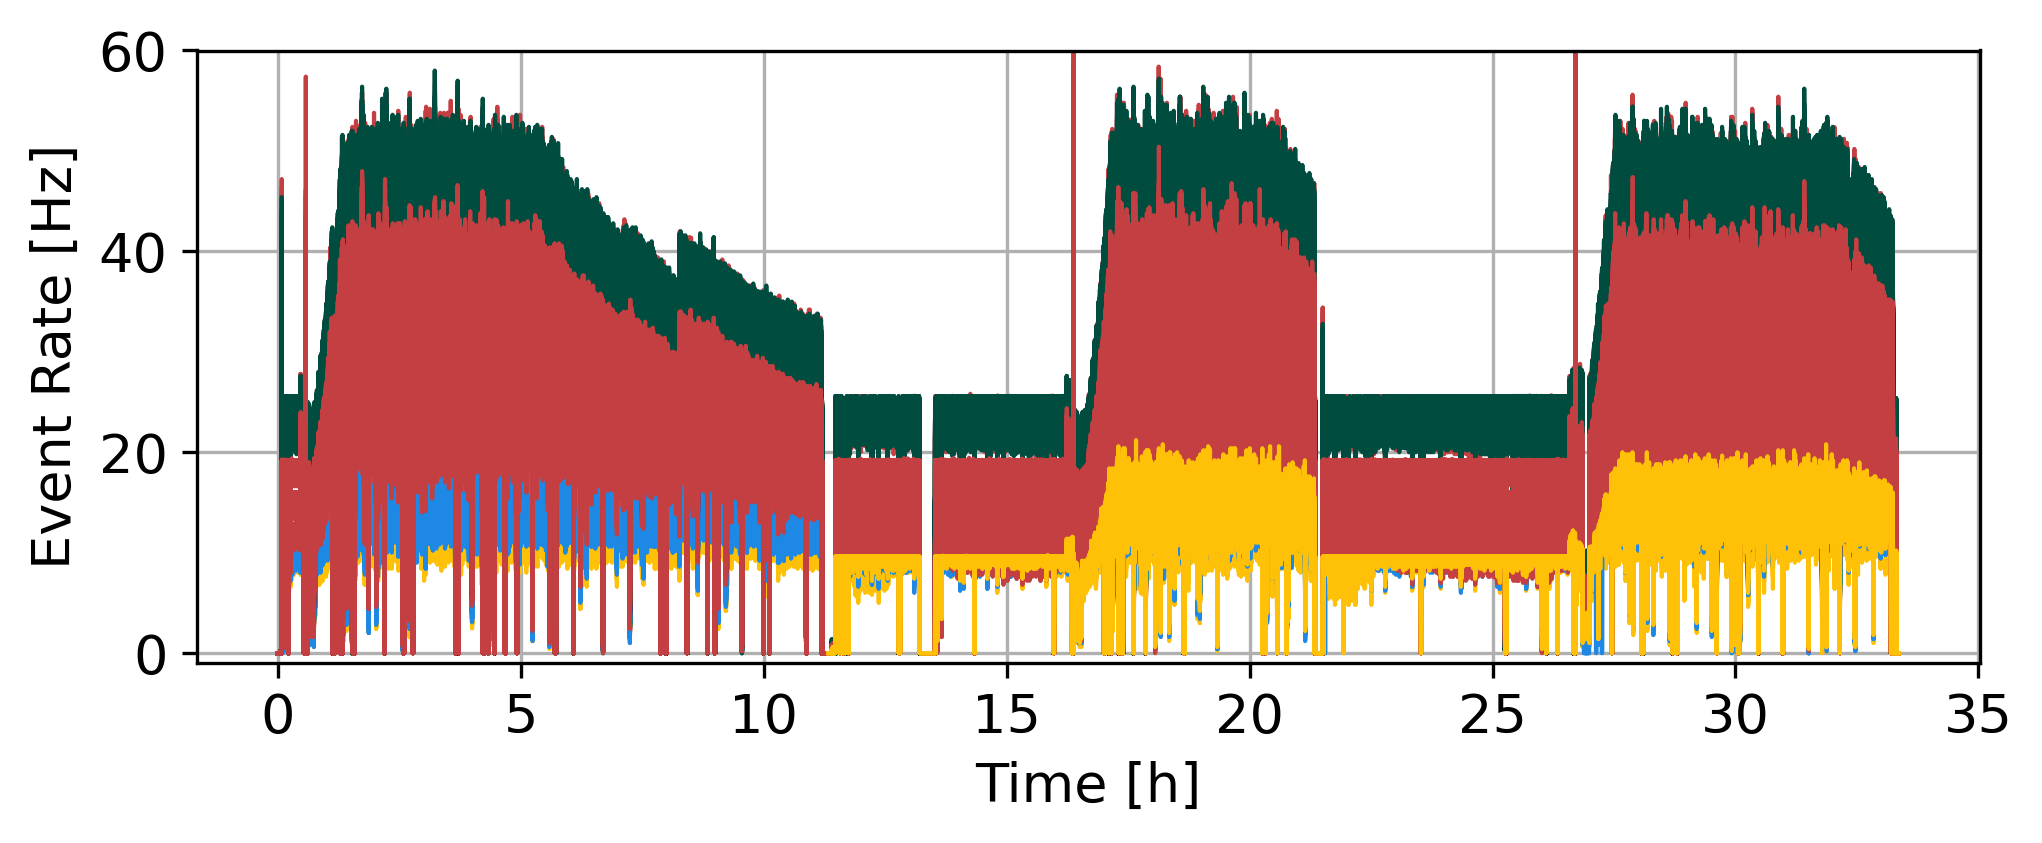

In [18]:
variant = "2023"


xlim_lower = 0
xlim_upper = -1
    
    
column_names = list(hlt_data_pd.columns.values)
print(f'Channels: {len(column_names)}')

nan_amount = np.mean(np.sum(pd.isna(hlt_data_pd.to_numpy()), 1)/hlt_data_pd.shape[1])
print(f'Mean sparsity original dataset: {100*nan_amount:.3f} %')

hlt_data_pd.dropna(axis=0,
                  thresh=50,
                  inplace=True)

hlt_data_np = hlt_data_pd.to_numpy()

nan_amount = np.mean(np.sum(pd.isna(hlt_data_np), 1)/hlt_data_pd.shape[1])
print(f'Mean sparsity preprocessed: {100*nan_amount:.3f} %')


tpu_numbers = [get_tpu_number(label) for label in column_names]
tpu_numbers_unique = np.array(list(set(tpu_numbers)))
rack_numbers = np.floor_divide(tpu_numbers, 1000)

hardware_configurations =[get_rack_hardware_configuration(rack_number, variant) + 1 for rack_number in rack_numbers]

channel_colors = [rack_colors[configuration] for configuration in hardware_configurations]

xlim_lower = 0
xlim_upper = -1
#hlt_data_np[xlim_lower:xlim_upper, channel] means from the first row to the last row for all the channel

fig, ax = plt.subplots(figsize=(7, 3), dpi=300)

ax.set_xlabel('Time [h]')
ax.set_ylabel('Event Rate [Hz]')

ax.set_ylim(-1, 60)

ax.grid()

x = np.arange(len(hlt_data_np[xlim_lower:xlim_upper, :]))*5/3600 #each row is 5 sec, x is represents time in hour

for channel in trange(hlt_data_np.shape[-1], desc='Plotting'):
    ax.plot(x, hlt_data_np[xlim_lower:xlim_upper, channel], linewidth=1, color=channel_colors[channel])

plt.tight_layout()
plt.show()

In [19]:
m_dbscan_eps = 3
m_dbscan_min_samples = 4
m_dbscan_duration_threshold = 4

dbscan_anomaly_detector = HLTDBSCANAnomalyDetector(tpu_labels,
                                                   m_dbscan_eps,
                                                   m_dbscan_min_samples,
                                                   m_dbscan_duration_threshold)

In [21]:
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
json_anomaly_registry = JSONAnomalyRegistry(output_dir)

dbscan_anomaly_detector.register_detection_callback(
                        json_anomaly_registry.clustering_detection)
timestamps = list(hlt_data_pd.index)
hlt_data_np = hlt_data_pd.to_numpy()

In [22]:
with logging_redirect_tqdm():
    for count, (timestamp, data) in enumerate(tzip(timestamps, hlt_data_np)):
        try:
            dbscan_anomaly_detector.process(timestamp, data)            
        except NonCriticalPredictionException:
            break

json_anomaly_registry.write_log_file("test_dataset")

  0%|          | 0/24018 [00:00<?, ?it/s]

50015: dropped to 0 at element 62
60009: dropped to 0 at element 808
12008: General anomaly encountered at element 11793
73008: General anomaly encountered at element 11793
49040: dropped to 0 at element 15486
49040: dropped to 0 at element 15500
76013: General anomaly encountered at element 19229
48040: dropped to 0 at element 19534
48040: dropped to 0 at element 19620


# Original code

In [17]:
variant = "2023"
dataset_df = pd.read_csv('/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/hlt_data_pd_2.csv', index_col=0)

xlim_lower = 0
xlim_upper = -1
    
    
column_names = list(dataset_df.columns.values)
print(f'Channels: {len(column_names)}')

nan_amount = np.mean(np.sum(pd.isna(dataset_df.to_numpy()), 1)/dataset_df.shape[1])
print(f'Mean sparsity original dataset: {100*nan_amount:.3f} %')

dataset_df.dropna(axis=0,
                  thresh=50,
                  inplace=True)

dataset_np = dataset_df.to_numpy()

nan_amount = np.mean(np.sum(pd.isna(dataset_np), 1)/dataset_df.shape[1])
print(f'Mean sparsity preprocessed: {100*nan_amount:.3f} %')


tpu_numbers = [get_tpu_number(label) for label in column_names]
tpu_numbers_unique = np.array(list(set(tpu_numbers)))
rack_numbers = np.floor_divide(tpu_numbers, 1000)

hardware_configurations =[get_rack_hardware_configuration(rack_number, variant) + 1 for rack_number in rack_numbers]

channel_colors = [rack_colors[configuration] for configuration in hardware_configurations]


FileNotFoundError: [Errno 2] No such file or directory: '/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/hlt_data_pd_2.csv'

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=300)

ax.set_xlabel('Time [h]')
ax.set_ylabel('Event Rate [Hz]')

ax.set_ylim(-1, 60)

ax.grid()

x = np.arange(len(dataset_np[xlim_lower:xlim_upper, :]))*5/3600

for channel in trange(dataset_np.shape[-1], desc='Plotting'):
    ax.plot(x, dataset_np[xlim_lower:xlim_upper, channel], linewidth=1, color=channel_colors[channel])

plt.tight_layout()
plt.show()

# Starting the model prediction

In [ ]:
#!/usr/bin/env python3

import importlib
import argparse
import sys
import datetime as dt
import json
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from tqdm.contrib import tzip
from tqdm.contrib.logging import logging_redirect_tqdm

sys.path.append('/eos/user/j/jhoya/DAQ/AnomalyDetection/strada/detection_combined/')


from reduction.medianstdreducer import MedianStdReducer
from transformer_based_detection.informers.informerrunner import InformerRunner
from utils.anomalyregistry import JSONAnomalyRegistry
from utils.reduceddatabuffer import ReducedDataBuffer
from utils.exceptions import NonCriticalPredictionException
from utils.consolesingleton import ConsoleSingleton

import clustering.dbscananomalydetector

importlib.reload(clustering.dbscananomalydetector)
from clustering.dbscananomalydetector import HLTDBSCANAnomalyDetector

In [ ]:
hlt_data_pd = pd.read_csv('data/hlt_data_pd_2.csv', index_col=0, parse_dates=True)

rack_config = '2023'

tpu_labels = list(hlt_data_pd.columns.values)

In [ ]:
tpu_labels

In [ ]:
hlt24_cols = [col for col in hlt_data_pd.columns if 'HLT-24' in col]
hlt28_cols = [col for col in hlt_data_pd.columns if 'HLT-28' in col]
hlt32_cols = [col for col in hlt_data_pd.columns if 'HLT-32:' in col]
hlt3232_cols = [col for col in hlt_data_pd.columns if 'HLT-32_32' in col] # 0% overallocation
hlt3240_cols = [col for col in hlt_data_pd.columns if 'HLT-32_40' in col] # 25% overallocation
hlt3248_cols = [col for col in hlt_data_pd.columns if 'HLT-32_48' in col] # 50% overallocation

In [ ]:
m_dbscan_eps = 3
m_dbscan_min_samples = 4
m_dbscan_duration_threshold = 4

dbscan_anomaly_detector = HLTDBSCANAnomalyDetector(tpu_labels,
                                                   m_dbscan_eps,
                                                   m_dbscan_min_samples,
                                                   m_dbscan_duration_threshold)

In [ ]:
output_dir = "output"
json_anomaly_registry = JSONAnomalyRegistry(output_dir)

dbscan_anomaly_detector.register_detection_callback(
                        json_anomaly_registry.clustering_detection)
timestamps = list(hlt_data_pd.index)
hlt_data_np = hlt_data_pd.to_numpy()

In [ ]:
with logging_redirect_tqdm():
    for count, (timestamp, data) in enumerate(tzip(timestamps, hlt_data_np)):
        try:
            dbscan_anomaly_detector.process(timestamp, data)            
        except NonCriticalPredictionException:
            break

json_anomaly_registry.write_log_file("run_456522")

# Testing only on rack-48 as this was the one showing the anomalies
Spoiler. It was a bug, there are no anomalies there...

In [ ]:
def filter_columns(column_name):
    # Split the column name on "."
    parts = column_name.split('.')
    if "rack-48" in parts[0]:
        return True
    return False

dataset_df = pd.read_csv('data/hlt_data_pd_2.csv', index_col=0, parse_dates=True)

# Apply the filter to get the columns we want
filtered_columns = [col for col in dataset_df.columns[:] if filter_columns(col)]

filtered_df = dataset_df[filtered_columns]

#print(filtered_df.shape)
#print(filtered_df.columns)
#print(filtered_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def extract_label(column_name):
    return column_name.split(':')[-1].split('.')[0].split('-')[-1]

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_title('Time Series Data')
ax.set_ylim(-1, 30)
ax.grid()

# Plot each column
for column in filtered_df.columns:
    label = extract_label(column)
    ax.plot(filtered_df.index, filtered_df[column], label=label)

ax.xaxis_date()
fig.autofmt_xdate()

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


In [ ]:
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re
import sys

# Load JSON anomaly data
with open('output/run_456522_old.json', 'r') as file: # This was the output file when there was a bug in the tpu_labels due to the overallocation % in 2023
    anomaly_data = json.load(file)

    
# Ensure the DataFrame index is timezone-aware
dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin')


# Function to extract intervals for machine "48002"
def extract_intervals_for_machine(anomaly_data, machine_name):
    intervals = []
    if machine_name in anomaly_data:
        for timestamp_str, details in anomaly_data[machine_name].items():
            start_time = pd.to_datetime(timestamp_str)
            if start_time.tzinfo is None:
                start_time = start_time.tz_localize('Europe/Berlin')
            else:
                start_time = start_time.tz_convert('Europe/Berlin')
            duration = details['duration']
            end_time = start_time + timedelta(seconds=duration)
            intervals.append((start_time, end_time))
    return intervals



# Extract intervals for machine "48002"
intervals = extract_intervals_for_machine(anomaly_data, "48002")

# Plotting the time series data
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_title('Time Series Data')
ax.set_ylim(-1, 30)
ax.grid()




# Function to extract the label from the column name
def extract_label(column_name):
    return column_name.split(':')[-1].split('.')[0].split('-')[-1]


# Plot each column
for column in filtered_df.columns:
    if "48002" not in column: continue
    label = extract_label(column)
    ax.plot(filtered_df.index, filtered_df[column], label=label)

ax.xaxis_date()
fig.autofmt_xdate()

# Overlay unique anomalies
for start, end in intervals:
    ax.axvspan(start, end, color='red', alpha=0.5, zorder=1)

    
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

# Now the proper version

In [ ]:
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

with open('output/run_454322.json', 'r') as file: 
    anomaly_data = json.load(file)

dataset_df = pd.read_csv('data/hlt_data_pd_454322.csv', index_col=0, parse_dates=True)

In [ ]:
# Ensure the DataFrame index is timezone-aware
dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin')  
# Function to extract intervals for all machines
def extract_intervals_for_all_machines(anomaly_data):
    intervals = {}
    for machine_name, anomalies in anomaly_data.items():
        intervals[machine_name] = []
        for timestamp_str, details in anomalies.items():
            start_time = pd.to_datetime(timestamp_str)
            if start_time.tzinfo is None:
                start_time = start_time.tz_localize('Europe/Berlin')
            else:
                start_time = start_time.tz_convert('Europe/Berlin')
            duration = details['duration'] * 5  # Convert timesteps to seconds (each timestep is 5 seconds)
            end_time = start_time + timedelta(seconds=duration)
            anomaly_type = details['types'][0]
            intervals[machine_name].append((start_time, end_time, anomaly_type))
    return intervals


# Extract intervals for all machines
intervals = extract_intervals_for_all_machines(anomaly_data)

# Plotting the time series data for all machines with anomalies
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.set_title('Time Series Data')
ax.set_ylim(-1, 30)
ax.grid()

# Function to extract the label from the column name
def extract_label(column_name):
    return column_name.split(':')[-1].split('.')[0].split('-')[-1]

# Initialize legend entries to keep track of added anomaly types
legend_entries = set()

# Plot each column for each machine with anomalies
for machine_id, machine_intervals in intervals.items():
    machine_columns = [col for col in dataset_df.columns if str(machine_id) in col]
    for column in machine_columns:
        label = extract_label(column)
        ax.plot(dataset_df.index, dataset_df[column], label=f'Node {label}')
        
    # Overlay unique anomalies using axvspan
    for start, end, anomaly_type in machine_intervals:
        color = 'red' if anomaly_type == 'ClusteringDropToZero' else 'blue'
        if anomaly_type not in legend_entries:
            ax.axvspan(start, end, color=color, alpha=0.5, zorder=1, label=anomaly_type)
            legend_entries.add(anomaly_type)
        else:
            ax.axvspan(start, end, color=color, alpha=0.5, zorder=1)
            
        # Add text annotation for machine_id
        ax.text(start, ax.get_ylim()[1] - 1, f'{machine_id}', rotation=90, verticalalignment='top', fontsize=8, color=color)

        

# Improve the formatting of the x-axis for dates
ax.xaxis_date()
fig.autofmt_xdate()

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, borderaxespad=0.)

plt.tight_layout()
plt.show()


# Getting the plots for all the runs with anomalies

In [ ]:
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import random
import os
from matplotlib.backends.backend_pdf import PdfPages

# Function to extract intervals for all machines
def extract_intervals_for_all_machines(anomaly_data):
    intervals = {}
    for machine_name, anomalies in anomaly_data.items():
        machine_name = machine_name.zfill(5)  # Ensure machine ID has 5 digits
        intervals[machine_name] = []
        for timestamp_str, details in anomalies.items():
            start_time = pd.to_datetime(timestamp_str)
            if start_time.tzinfo is None:
                start_time = start_time.tz_localize('Europe/Berlin')
            else:
                start_time = start_time.tz_convert('Europe/Berlin')
            duration = details['duration'] * 5  # Convert timesteps to seconds (each timestep is 5 seconds)
            end_time = start_time + timedelta(seconds=duration)
            anomaly_type = details['types'][0]
            intervals[machine_name].append((start_time, end_time, anomaly_type))
    return intervals

# Function to extract the label from the column name
def extract_label(column_name):
    return column_name.split(':')[-1].split('.')[0].split('-')[-1]

# Define a color palette for different machines
colors = list(mcolors.TABLEAU_COLORS.values())

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by mixing it with white.
    
    Parameters:
    color (str or tuple): Matplotlib color
    amount (float): Amount to lighten the color (0 to 1)
    
    Returns:
    tuple: Lightened color
    """
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgba(c)
    white = np.array([1, 1, 1, 1])
    return tuple((1 - amount) * np.array(c) + amount * white)

def plot_run(run_number, pdf=None):
    # Load JSON anomaly data
    json_file = f'output/run_{run_number}.json'
    csv_file = f'data/hlt_data_pd_{run_number}.csv'

    if not os.path.exists(json_file) or not os.path.exists(csv_file):
        print(f"Missing files for run number {run_number}")
        return

    with open(json_file, 'r') as file: 
        anomaly_data = json.load(file)


    dataset_df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
    # Ensure the DataFrame index is timezone-aware
    dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin') 
    
    # Extract intervals for all machines
    intervals = extract_intervals_for_all_machines(anomaly_data)

    # Plotting the time series data for all machines with anomalies
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    ax.set_xlabel('Time')
    ax.set_ylabel('DCM rate [kHz]')
    ax.set_title(f'Time Series Data for Run {run_number}')
    ax.set_ylim(-1, 60)
    ax.grid()

    legend_entries = set()

    # Plot each column for each machine with anomalies and an extra machine
    for idx, (machine_id, machine_intervals) in enumerate(intervals.items()):
        color = colors[idx % len(colors)]
        machine_columns = [col for col in dataset_df.columns if str(machine_id) in col]
        
        # Plot the actual machine with anomalies
        for column in machine_columns:
            label = extract_label(column)
            ax.plot(dataset_df.index, dataset_df[column], label=f'Node - {label}', color=color)
        
        # Find an extra machine with the same starting number but not in the JSON file   
        machine_prefix = str(machine_id)[:2]
        possible_extra_machines = [col for col in dataset_df.columns if f"tpu-rack-{machine_prefix}" in col and str(machine_id) not in col]
        if possible_extra_machines:
            extra_column = random.choice(possible_extra_machines)
            label = extract_label(extra_column)
            ax.plot(dataset_df.index, dataset_df[extra_column], label=f'Node {label} (extra)', color=lighten_color(color, 0.5))

        # Overlay unique anomalies
        for start, end, anomaly_type in machine_intervals:
            anomaly_color = 'red' if anomaly_type == 'ClusteringDropToZero' else 'blue'
            if anomaly_type not in legend_entries:
                ax.axvspan(start, end, color=anomaly_color, alpha=0.5, zorder=1, label=anomaly_type)
                legend_entries.add(anomaly_type)
            else:
                ax.axvspan(start, end, color=anomaly_color, alpha=0.5, zorder=1)
                
            # Add text annotation for machine_id
            ax.text(start, ax.get_ylim()[1] - 1, f'{machine_id}', rotation=90, verticalalignment='top', fontsize=8, color=color)


    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
    fig.autofmt_xdate()

    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, borderaxespad=0.)

    plt.tight_layout()
    
    if pdf:
        pdf.savefig(fig)
        plt.close(fig)
    else:
        plt.show()

def plot_zoomed_anomalies(dataset_df, intervals, run_number, pdf=None):
    # Define the zoom window duration (e.g., 5 minutes before and after the anomaly)
    zoom_window = timedelta(minutes=5)
    
    for machine_id, machine_intervals in intervals.items():
        color = colors[hash(machine_id) % len(colors)]
        machine_columns = [col for col in dataset_df.columns if str(machine_id) in col]
        
        for start, end, anomaly_type in machine_intervals:
            fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
            ax.set_xlabel('Time')
            ax.set_ylabel('DCM rate [kHz]')
            ax.set_title(f'Zoomed Anomaly for Run {run_number} - Node {machine_id}')
            ax.set_ylim(-1, 60)
            ax.grid()
            
            zoom_start = start - zoom_window
            zoom_end = end + zoom_window
            
            # Plot the machine's data within the zoom window
            for column in machine_columns:
                label = extract_label(column)
                zoomed_data = dataset_df.loc[zoom_start:zoom_end, column]
                ax.plot(zoomed_data.index, zoomed_data, label=f'Node - {label}', color=color)
            
            # Find an extra machine with the same starting number but not in the JSON file
            machine_prefix = str(machine_id)[:2]
            possible_extra_machines = [col for col in dataset_df.columns if f"tpu-rack-{machine_prefix}" in col and str(machine_id) not in col]
            if possible_extra_machines:
                extra_column = random.choice(possible_extra_machines)
                label = extract_label(extra_column)
                zoomed_data = dataset_df.loc[zoom_start:zoom_end, extra_column]
                ax.plot(zoomed_data.index, zoomed_data, label=f'Node {label} (extra)', color=lighten_color(color, 0.5))

            # Overlay the anomaly interval
            ax.axvspan(start, end, color='red' if anomaly_type == 'ClusteringDropToZero' else 'blue', alpha=0.5, zorder=1, label=anomaly_type)
            ax.text(start, ax.get_ylim()[1] - 1, f'{machine_id}', rotation=90, verticalalignment='top', fontsize=8, color=color)
            

            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
            fig.autofmt_xdate()

            plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, borderaxespad=0.)

            plt.tight_layout()

            if pdf:
                pdf.savefig(fig)
                plt.close(fig)
            else:
                plt.show()



In [ ]:
run_numbers = ['454322', '455795', '455818', '456151', '456164', '456225', '456273', '456314', '455623']

# for run_number in run_numbers:
#     plot_run(run_number)
#     # Load anomaly data and dataset_df as before
#     json_file = f'output/run_{run_number}.json'
#     csv_file = f'data/hlt_data_pd_{run_number}.csv'
#     if os.path.exists(json_file) and os.path.exists(csv_file):
#         with open(json_file, 'r') as file: 
#             anomaly_data = json.load(file)
#         dataset_df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
#         dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin') 
#         intervals = extract_intervals_for_all_machines(anomaly_data)
#         plot_zoomed_anomalies(dataset_df, intervals, run_number)
        
        
        
# Create a PDF file to save all plots
with PdfPages('anomaly_plots.pdf') as pdf:
    for run_number in run_numbers:
        plot_run(run_number, pdf)
        # Load anomaly data and dataset_df as before
        json_file = f'output/run_{run_number}.json'
        csv_file = f'data/hlt_data_pd_{run_number}.csv'
        if os.path.exists(json_file) and os.path.exists(csv_file):
            with open(json_file, 'r') as file: 
                anomaly_data = json.load(file)
            dataset_df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
            dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin')
            intervals = extract_intervals_for_all_machines(anomaly_data)
            plot_zoomed_anomalies(dataset_df, intervals, run_number, pdf)


In [ ]:
run_numbers = ['456314']

for run_number in run_numbers:
    plot_run(run_number)
    # Load anomaly data and dataset_df as before
    json_file = f'output/run_{run_number}.json'
    csv_file = f'data/hlt_data_pd_{run_number}.csv'
    if os.path.exists(json_file) and os.path.exists(csv_file):
        with open(json_file, 'r') as file: 
            anomaly_data = json.load(file)
        dataset_df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
        dataset_df.index = dataset_df.index.tz_convert('Europe/Berlin')
        intervals = extract_intervals_for_all_machines(anomaly_data)
        plot_zoomed_anomalies(dataset_df, intervals, run_number)

# Looking at the informer part

In [5]:
#!/usr/bin/env python3

import importlib
import argparse
import sys
import datetime as dt
import json
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.contrib import tzip
from tqdm.contrib.logging import logging_redirect_tqdm

sys.path.append('/eos/user/j/jhoya/DAQ/AnomalyDetection/strada/detection_combined/')

from utils.anomalyregistry import JSONAnomalyRegistry
from utils.reduceddatabuffer import ReducedDataBuffer
from utils.exceptions import NonCriticalPredictionException
from utils.consolesingleton import ConsoleSingleton

import clustering.dbscananomalydetector
importlib.reload(clustering.dbscananomalydetector)
from clustering.dbscananomalydetector import HLTDBSCANAnomalyDetector

import reduction.basereducer
importlib.reload(reduction.basereducer)
from reduction.basereducer import BaseReducer

import reduction.medianstdreducer
importlib.reload(reduction.basereducer)
from reduction.medianstdreducer import MedianStdReducer


import transformer_based_detection.informers.informerrunner
importlib.reload(transformer_based_detection.informers.informerrunner)
from transformer_based_detection.informers.informerrunner import InformerRunner

In [6]:
#hlt_data_pd = pd.read_csv('data/hlt_data_pd_456522.csv', index_col=0, parse_dates=True)
hlt_data_pd = pd.read_csv('data/hlt_data_pd_455795.csv', index_col=0, parse_dates=True)
#run_numbers = ['454322', '455795', '455818', '456151', '456164', '456225', '456273', '456314', '455623']
# Ensure the DataFrame index is timezone-aware
hlt_data_pd.index = hlt_data_pd.index.tz_convert('Europe/Berlin') 

rack_config = '2023'

median_std_reducer = MedianStdReducer(rack_config)
     
informer_runner = InformerRunner('/eos/user/k/kstehle/Documents/phd/deephydra_models/hlt_2023_mse_Scale_0.8_1.0_Scale_APP_0.8_1.0_0.01_0.05_0.05_rel_size_1.0_ratio_0.25_seed_192/', device='cpu')

tpu_labels = list(hlt_data_pd.columns.values)

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
output_dir = "output"
model = "Informer-MSE"

if model == 'Informer-SMSE':
    reduced_data_buffer = ReducedDataBuffer(size=65)
else:
    reduced_data_buffer = ReducedDataBuffer(size=17)


reduced_data_buffer.set_buffer_filled_callback(informer_runner.detect)
        
json_anomaly_registry = JSONAnomalyRegistry(output_dir)

informer_runner.register_detection_callback(
                        json_anomaly_registry.transformer_detection)

timestamps = list(hlt_data_pd.index)
hlt_data_np = hlt_data_pd.to_numpy()

In [8]:
with logging_redirect_tqdm():
    for count, (timestamp, data) in enumerate(tzip(timestamps, hlt_data_np)):
        try:
            output_slice = median_std_reducer.reduce_numpy(tpu_labels,
                                                            timestamp,
                                                            data)
            reduced_data_buffer.push(output_slice)
        except NonCriticalPredictionException:
            break

json_anomaly_registry.write_log_file("run_455795")

  0%|          | 0/10994 [00:00<?, ?it/s]

Some Racks are missing... 2nd stage detection performance might be affected.
Half or more of the TPUs in rack(s) 11, 22 are inactive. Second stage detection might be affected
Transformer-based detection encountered anomaly at timestamp 2023-07-01 16:46:00
